<a href="https://colab.research.google.com/github/Hansaraj09/PCA_on_Wine/blob/main/PCA_on_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [ ]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine = wine.dropna(axis = 0)

In [ ]:
wine.shape

(6463, 13)

In [ ]:
# Your Code goes Here
wine.shape

(6463, 13)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score


In [ ]:
encode = LabelEncoder()
wine['type']= encode.fit_transform(wine['type'])

In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

In [ ]:
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
459,1,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000
1460,1,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000
4403,1,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333
3828,1,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000
4317,1,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
3798,1,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.900000
5219,0,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.700000
5254,0,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.000000
5418,0,9.8,0.25,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.000000


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.46867749419953597


In [ ]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.57094748, -0.86265684,  0.56588915, ...,  0.94784355,
        -0.20357893, -1.66472797],
       [ 0.57094748,  0.99186667, -1.02945526, ...,  0.38700578,
        -0.87653487,  1.63149383],
       [ 0.57094748, -1.55810316, -0.72265826, ..., -0.17383198,
        -0.74194369, -0.62233304],
       ...,
       [-1.7514746 ,  3.31002106,  0.44317035, ...,  0.26237517,
         2.35365364,  0.44823472],
       [-1.7514746 ,  1.99640024, -0.53858006, ...,  1.25942008,
         2.48824482, -0.39695035],
       [ 0.57094748,  1.22368211,  0.13637334, ..., -0.17383198,
        -0.33817012, -0.48146886]])

In [ ]:
for i in range(1,13):
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca,y_train)
    y_pred = knn.predict(X_test_pca)
    print(accuracy_score(y_test,y_pred))





0.4276875483372003
0.4648105181747873
0.4802784222737819
0.5181747873163186
0.5174013921113689
0.5460170146945089
0.5483372003093581
0.5506573859242073
0.5475638051044084
0.5498839907192575
0.5552977571539056
0.5568445475638051


In [ ]:
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
knn= KNeighborsClassifier()
knn.fit(X_train_pca,y_train)
y_pred = knn.predict(X_test_pca)
print(accuracy_score(y_test,y_pred))

0.5568445475638051


In [ ]:
X_train_pca

array([[ 2.29379117e+00,  2.03049677e+00, -2.28119134e+00, ...,
        -2.59864300e-01,  1.40070958e-01, -1.11758597e-01],
       [ 9.54741761e-01, -7.04538318e-01,  2.80237707e+00, ...,
         4.11845566e-01, -1.38432720e-03,  4.48687446e-02],
       [ 2.02907272e+00,  1.80067112e-01, -2.41001251e-01, ...,
        -4.74055528e-01, -6.21053424e-01,  3.13043612e-02],
       ...,
       [-3.44310206e+00,  2.13772126e+00,  2.22804668e+00, ...,
         3.36840791e-01,  2.78889612e-01,  2.57688489e-01],
       [-3.40176558e+00,  1.39815486e+00,  1.45740107e+00, ...,
         2.22985909e-02,  1.15132885e-01, -2.42342979e-01],
       [-3.15662192e-01,  2.12483182e-01,  1.23477449e+00, ...,
         6.99433432e-01,  2.93287494e-01,  1.29576564e-01]])

In [ ]:
pca.explained_variance_

array([3.80102181, 2.51752237, 1.55942365, 0.99078869, 0.72817892,
       0.61317402, 0.5314006 , 0.50270875, 0.3553869 , 0.25717757,
       0.12061058, 0.02492768])

In [ ]:
pca.components_.shape

(12, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.31669055, 0.20975295, 0.12992684, 0.08254975, 0.06066984,
       0.05108795, 0.04427482, 0.04188429, 0.02960985, 0.02142732,
       0.01004894, 0.0020769 ])

In [ ]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
pca.explained_variance_.shape

(12,)

In [ ]:
pca.components_.shape

(12, 12)

In [ ]:
pca.explained_variance_ratio_

array([0.31669055, 0.20975295, 0.12992684, 0.08254975, 0.06066984,
       0.05108795, 0.04427482, 0.04188429, 0.02960985, 0.02142732,
       0.01004894, 0.0020769 ])

In [ ]:
import numpy as np

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.31669055, 0.5264435 , 0.65637034, 0.73892009, 0.79958993,
       0.85067788, 0.8949527 , 0.93683699, 0.96644684, 0.98787416,
       0.9979231 , 1.        ])

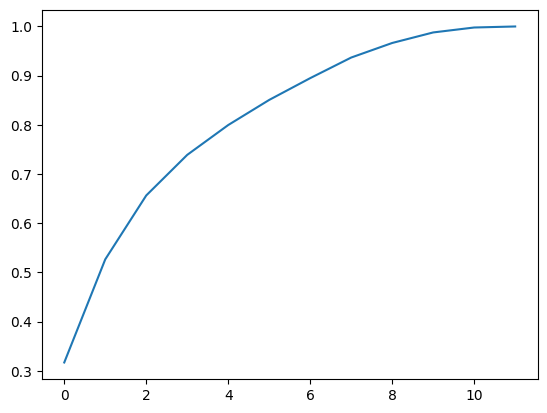

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# thus best results are obtained at n_components = 7 to 8